In [1]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras import applications
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import *
from tensorflow.keras.utils import plot_model
from tensorflow.python.keras.applications.resnet import ResNet50
import matplotlib.pyplot as plt
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
from convnets.utilities import utils_nets


In [2]:
# dimensions of our images.
img_width, img_height = 224, 224

train_data_dir = '../../../data/passport_2class_divided_clean/train'
validation_data_dir = '../../../data/passport_2class_divided_clean/validation'

# weigths_path = '/home/mksnkv/models/top_tuned/resnet50/resnet50_passport_weights.h5'
# structure_path = '/home/mksnkv/models/top_tuned/resnet50/conv_two_class_structure.json'
nb_train_samples = 480
nb_validation_samples = 130
nb_evaluation_samples = 780
NUM_CLASSES = 1
RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'sigmoid'
OBJECTIVE_FUNCTION = 'binary_crossentropy'
LOSS_METRICS = ['accuracy']
NUM_EPOCHS = 20
EARLY_STOP_PATIENCE = 3
batch_size = 5
BATCH_SIZE_TESTING = 1

In [3]:
train_generator, val_generator = utils_nets.init_generators(train_data_dir, 
                                                       validation_data_dir, 
                                                       img_width, 
                                                       img_height, 
                                                       batch_size,
                                                       batch_size)

Found 480 images belonging to 2 classes.
Found 130 images belonging to 2 classes.


In [4]:
# build the ResNet50 network
model = Sequential()
model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = 'imagenet'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.layers[0].trainable = False
    
opt = Adam(learning_rate=1e-5)
model.compile(optimizer = opt, loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)
model.summary()
    
# train model
# cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = EARLY_STOP_PATIENCE)
# cb_checkpointer = ModelCheckpoint(filepath = '../working/best.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')
fit_history = model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs = NUM_EPOCHS,
        validation_data=val_generator,
        validation_steps=nb_validation_samples // batch_size
    )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 24,112,513
Trainable params: 524,801
Non-trainable params: 23,587,712
_________________________________________________________________
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
96/96 [==========

In [5]:
# model.save_weights(weigths_path)
# utils_nets.save_model_structure_to_json(structure_path, model)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


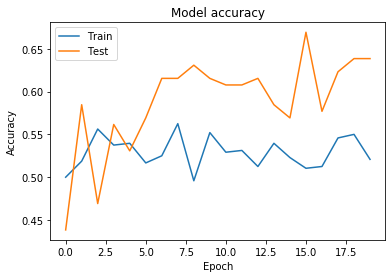

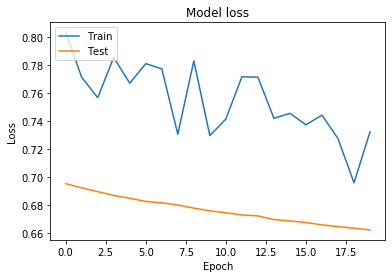

In [6]:
utils_nets.plot(fit_history)
